In [1]:
import caffe
import numpy as np
from skimage import color
import skimage
import imageio
import matplotlib.pyplot as plt

# caffe.set_mode_cpu()
caffe.set_device(0)
caffe.set_mode_gpu()
net = caffe.Net('lenet_deploy.prototxt', 'mixed_lenet_8817_id_digit.caffemodel', caffe.TEST)

(35, 35)


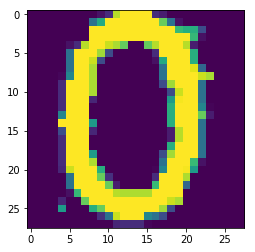

Number: 0
[[9.9952126e-01 2.3936673e-07 1.0970878e-05 1.2655147e-06 3.1811157e-06
  1.3708400e-06 3.8759041e-04 3.2701539e-06 2.8520149e-06 6.7938956e-05]]
0.99952126


In [7]:
img = caffe.io.load_image('1.png')

# plt.imshow(im)
# plt.show()

# print(img)
img_gray = color.rgb2gray(img)
print(img_gray.shape)
# img_gray = 1 - img_gray # invert the white background image

# plt.imshow(img_gray)
plt.show()

img_gray_resized = skimage.transform.resize(img_gray, (28, 28), mode='constant')
plt.imshow(img_gray_resized)
plt.show()
# print(img_gray_resized.shape)

# print("Sum = ", np.sum(img_gray_resized))
net.blobs['data'].data[...] = img_gray_resized[np.newaxis, np.newaxis, :, :]

out = net.forward()
# print(np.sum(out['prob']))
# print(out['prob'].shape)
print("Number:", out['prob'].argmax())
print(out['prob'])
print(out['prob'].max())
# print(out['argmax'])